## Overview

In this project, I use Polars and Seaborn to analyze and visualize some insights of a 2018 baseball stats dataframe, focusing specifically in pitches and distributions of them.

Also I obtain some useful information regarding the type of pitch it's velocity and spin rate.

1. **Velocity:** refers to the speed at which the baseball travels after it is released by the pitcher. It is typically measured in miles per hour (MPH) or kilometers per hour (KPH).

2. **Spin Rate:** is the measure of how many revolutions per minute (RPM) a baseball makes as it travels towards the plate. The spin rate affects the movement of the pitch. For example, a high spin rate on a fastball can create a "rising" effect, making it appear as if the ball is defying gravity. Conversely, a low spin rate on a breaking ball like a curveball can enhance the drop or horizontal movement of the pitch.

The tools used for this small project are:

- Polars
- Seaborn

In [22]:
# Default Imports
import polars as pl
import seaborn as sns 

In [29]:
# Reading the data .csv file
data = pl.read_csv('./data/pitches.csv')

After reading the .csv file, I print the first 10 rows to check if it was read correctly, and how the dataframe is constructed.

In [30]:
data.head(10)

ab_id,pitcher,batter,i,b,s,o,pitch_type,mph,type,code,x0,y0,z0,px,pz,spin_rate,spin_dir,sz_bot,sz_top,pitch_num,end_speed,g_id,b_score,pitcher_team,on_1b,on_2b,on_3b,b_score_after_pitch
i64,str,str,i64,i64,i64,i64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,i64,str,f64,f64,f64,i64
2018003856,"""S.Romano""","""A.Eaton""",1,0,0,0,"""FT""",95.4,"""B""","""B""",-1.628619,50.0,6.398163,0.444047,1.207495,2875.281,221.465,1.425644,3.074842,1,87.2,201800050,0,"""CIN""",0.0,0.0,0.0,0
2018003856,"""S.Romano""","""A.Eaton""",1,1,0,0,"""FT""",95.0,"""S""","""C""",-1.576306,50.0,6.457097,0.587445,1.623533,2778.109,225.462,1.401167,3.105028,2,86.7,201800050,0,"""CIN""",0.0,0.0,0.0,0
2018003856,"""S.Romano""","""A.Eaton""",1,1,1,0,"""FT""",89.9,"""X""","""D""",-1.837934,50.0,6.386948,0.052704,2.266282,2310.241,218.536,1.231324,2.959774,3,82.8,201800050,0,"""CIN""",0.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,0,0,"""FT""",95.2,"""S""","""C""",-2.086613,50.0,6.311156,-0.193338,2.964638,2827.717,219.436,1.496075,3.077617,1,86.0,201800050,0,"""CIN""",1.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,1,0,"""FT""",95.4,"""S""","""S""",-1.923722,50.0,6.443138,-1.411895,1.669428,2999.029,236.059,1.271575,3.171093,2,86.3,201800050,0,"""CIN""",1.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,2,0,"""FT""",96.5,"""S""","""F""",-1.804642,50.0,6.360603,-0.850372,1.561572,2936.672,234.726,1.271575,3.171093,3,87.9,201800050,0,"""CIN""",1.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,2,0,"""FT""",96.0,"""S""","""F""",-1.789617,50.0,6.398982,-0.857586,1.554412,2535.903,229.895,1.271575,3.171093,4,88.7,201800050,0,"""CIN""",1.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,0,2,0,"""SL""",87.9,"""B""","""B""",-2.153083,50.0,6.24216,0.206855,0.885702,110.608,17.848,1.478807,3.232923,5,81.4,201800050,0,"""CIN""",1.0,0.0,0.0,0
2018003857,"""S.Romano""","""A.Rendon""",1,1,2,0,"""FT""",96.5,"""S""","""F""",-1.652777,50.0,6.441502,-0.723858,2.062297,2557.853,233.808,1.271575,3.171093,6,88.8,201800050,0,"""CIN""",1.0,0.0,0.0,0


We can get useful info from the data such as the name of the columns and its type set using the ``schema`` property.

In [39]:
data.schema

Schema([('ab_id', Int64),
        ('pitcher', String),
        ('batter', String),
        ('i', Int64),
        ('b', Int64),
        ('s', Int64),
        ('o', Int64),
        ('pitch_type', String),
        ('mph', Float64),
        ('type', String),
        ('code', String),
        ('x0', Float64),
        ('y0', Float64),
        ('z0', Float64),
        ('px', Float64),
        ('pz', Float64),
        ('spin_rate', Float64),
        ('spin_dir', Float64),
        ('sz_bot', Float64),
        ('sz_top', Float64),
        ('pitch_num', Int64),
        ('end_speed', Float64),
        ('g_id', Int64),
        ('b_score', Int64),
        ('pitcher_team', String),
        ('on_1b', Float64),
        ('on_2b', Float64),
        ('on_3b', Float64),
        ('b_score_after_pitch', Int64)])

Using the ``mean()``method we can obtain the mean percentile for a column only if this is Float64 or Int64 type. Below we calculate the mean velocity of the miles per hour of all pitches of the dataframe.

In [38]:
avg_mph = data["mph"].mean()
avg_mph

88.35832937181665

Below we display a relation plot of all types of pitches, seeing the relation between mph and spin rate. We can infer that as the velocity increases the velocity does as well. 

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


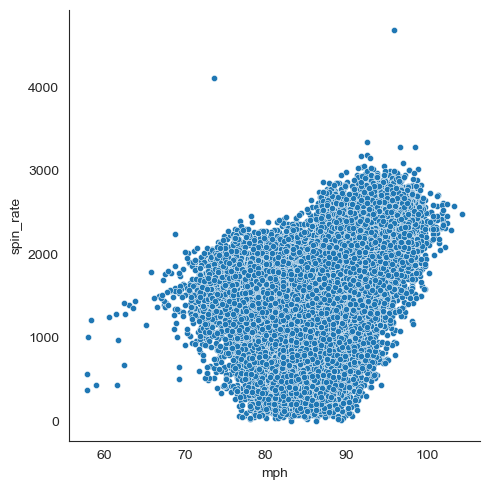

In [40]:
sns.relplot(data=data, x="mph", y="spin_rate", s=20)

But, that might not be true for all types of pitches. On the below relation plot I added the ``hue`` parameter and added the __pitch_type__ column so each different type of pitch gets a unique color.

Pytch types:

1. **FT:** Two Seam Fastball
2. **SL:** Slider
3. **CU:** Curveball
4. **CH:** Change up
5. **FF:** Four Seam Fastball
6. **SI:** Sinker
7. **KC:** Knuckle Curve
8. **FC:** Cutter (Cut Fastball)
9. **FS:** Splitter
10. **FO:** Forkball
11. **EP:** Ephus
12. **PO:**

Once we plot all types of pitches we can get a rough idea on how the spin rate fluctuates in relation with the velocity.

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


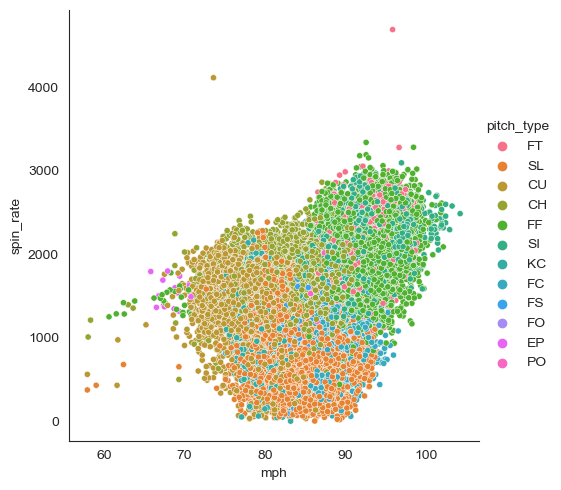

In [32]:
sns.relplot(data=data, x="mph", y="spin_rate", s=20, hue="pitch_type")


Below, I display one relation plot for every pitch type.

We add the ``col`` attribute passing __pitch_type__ as its value.

As you can see we can conclude a couple of things:

1. For fastball pitches (four-seam fastball, two-seam fastball, sinker) the harder it gets thrown the more spin rate it produces.
2. For pitches such as change ups, sliders, and curveballs the spin rate does not fluctuate as much as it does with fast pitches.

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


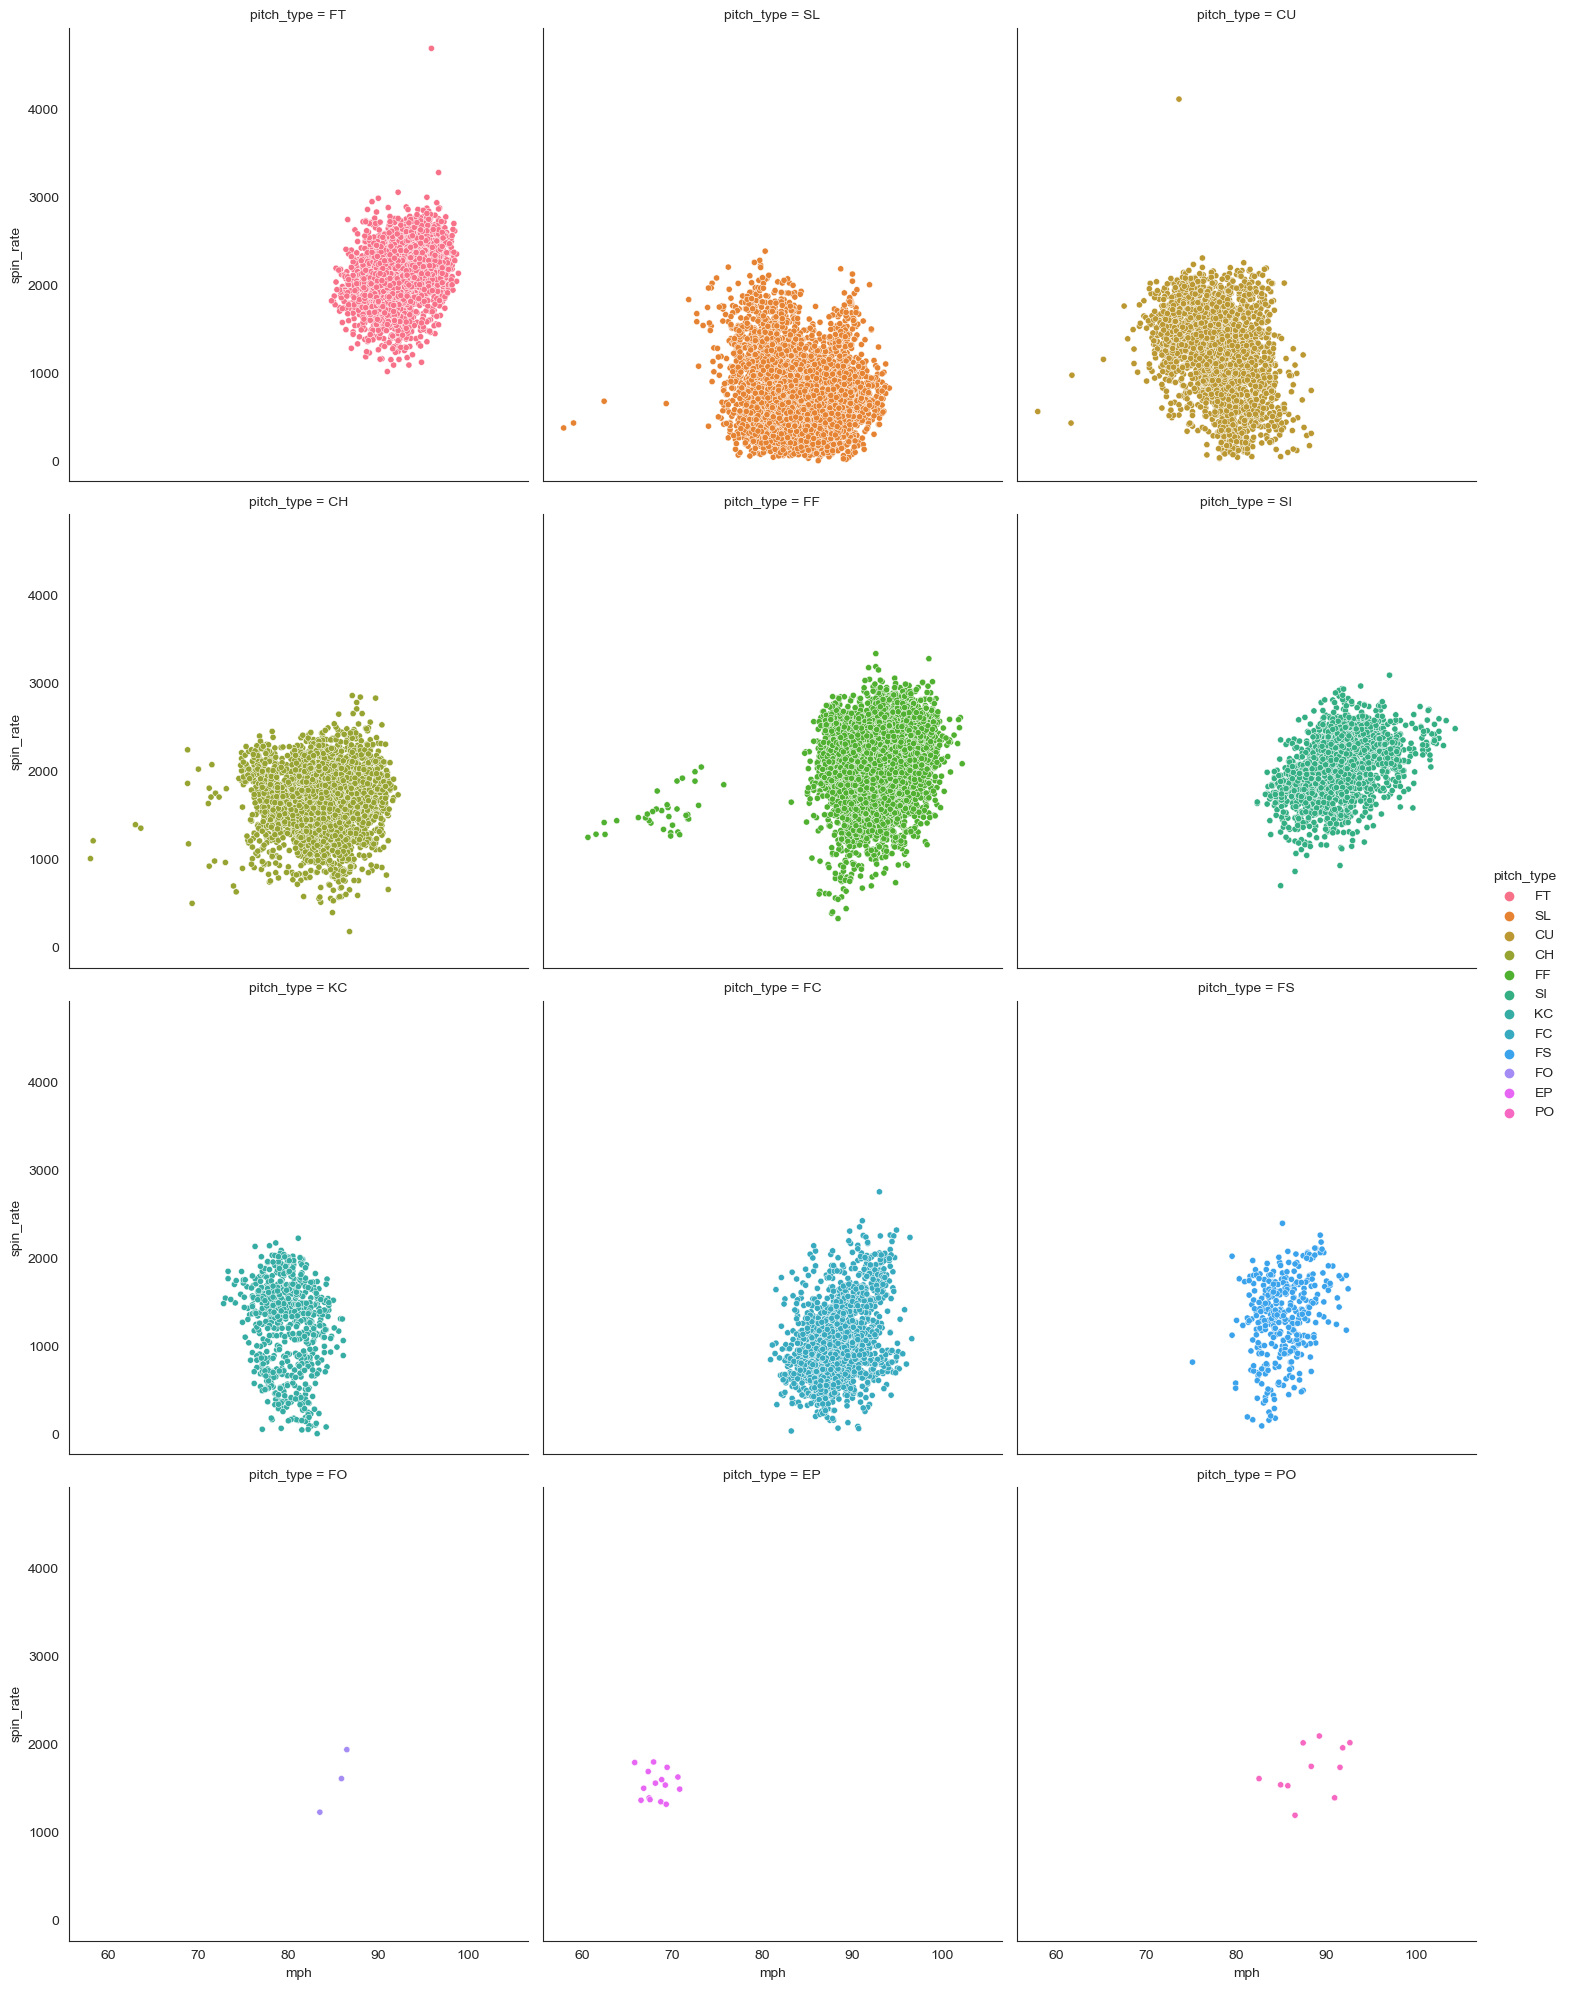

In [33]:
sns.relplot(data=data, x="mph", y="spin_rate", s=20, hue="pitch_type", col="pitch_type", col_wrap=3)

Below we use a different plot called distribution plot, which gives us a hint of where in the quadrant the variables spin rate and velocity are denser.

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


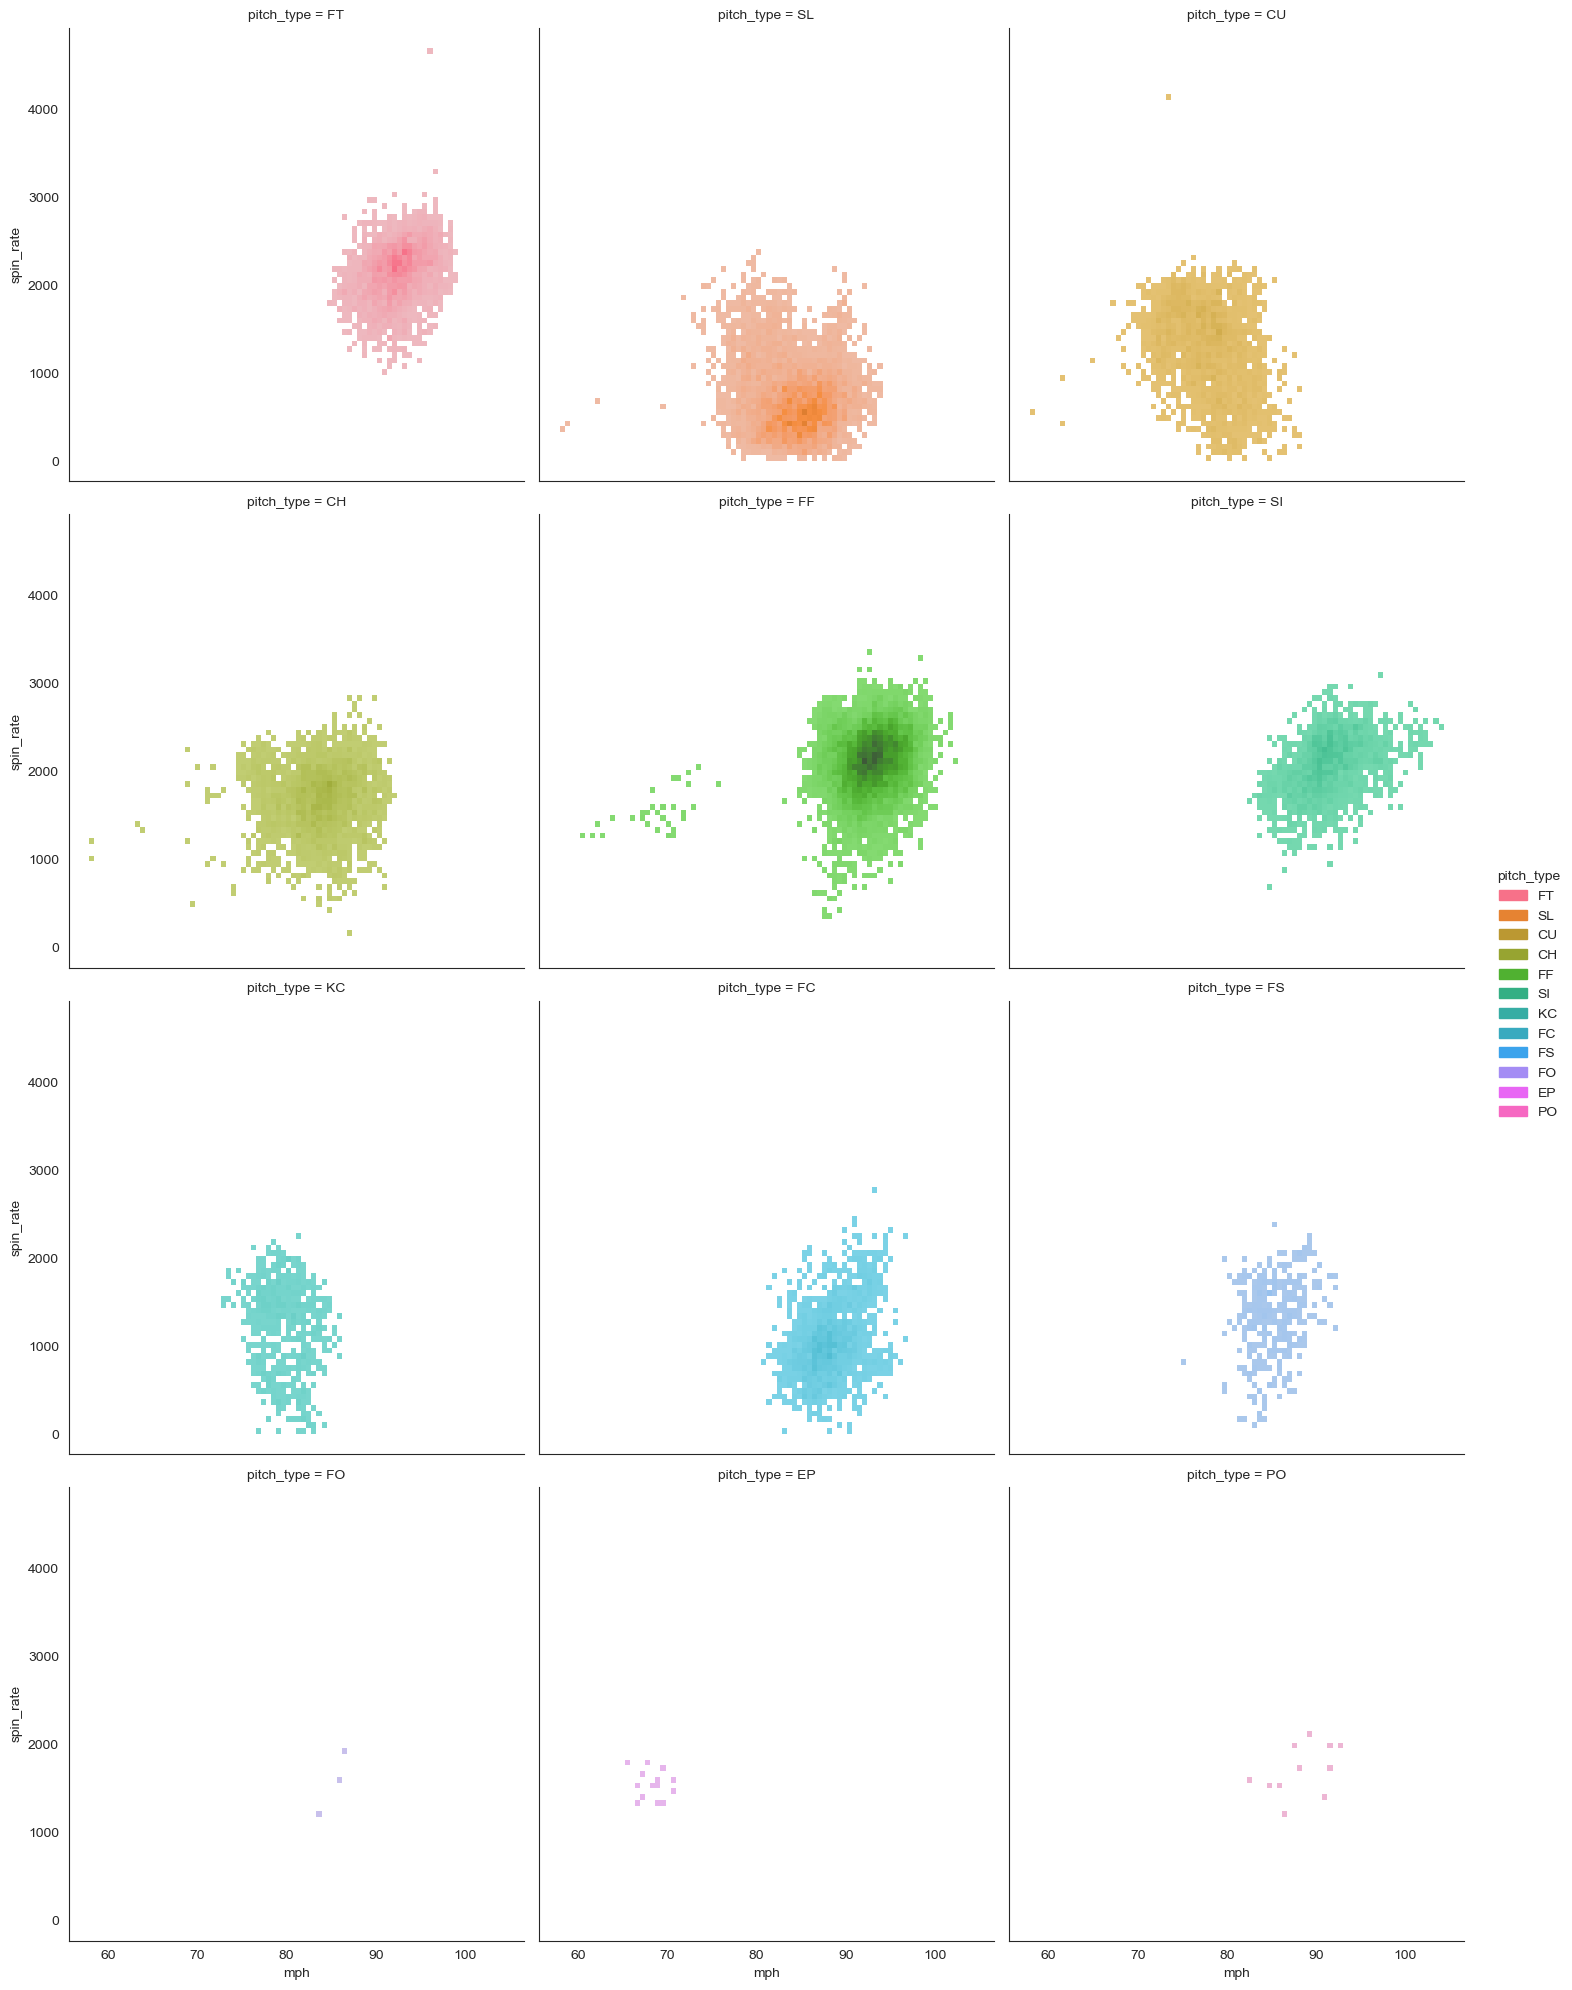

In [34]:
sns.displot(data=data, x="mph", y="spin_rate", col="pitch_type", hue="pitch_type", col_wrap=3)

Lastly, on the plots below we use the parameter ``kind`` and pass __kde__ as value. This makes the relations a bit more noticeable. For instance, it's clear that the relationship between spin and velocity is negative for change ups and slightly more positive for fastballs.

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


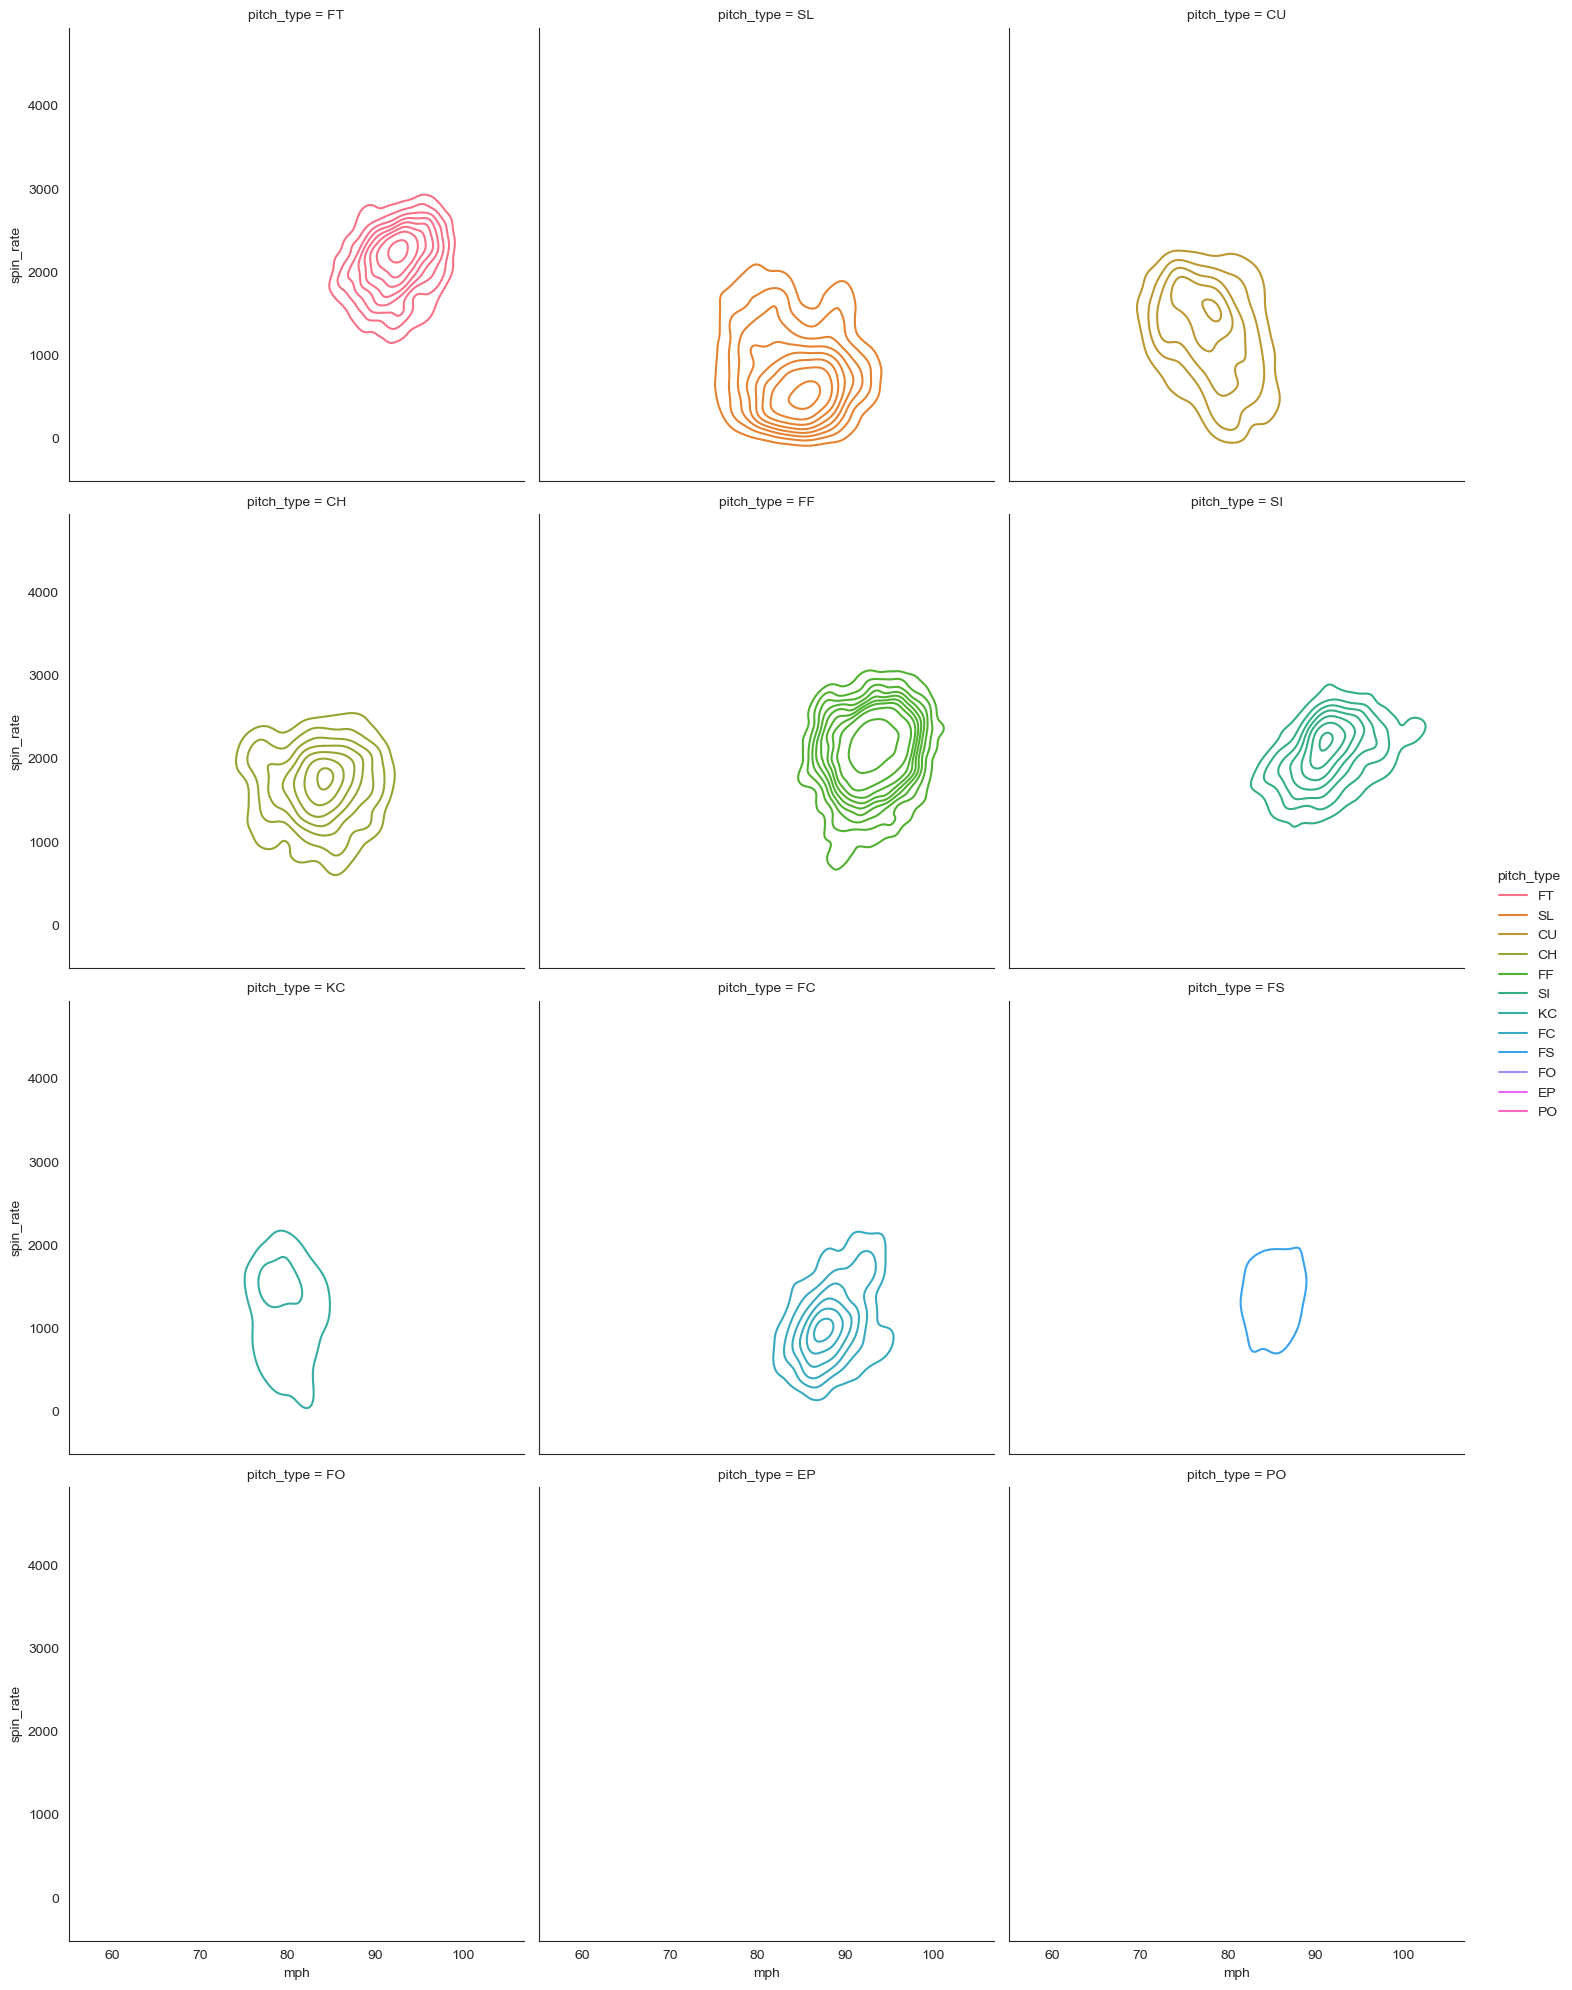

In [35]:
sns.displot(data=data, x="mph", y="spin_rate", col="pitch_type", hue="pitch_type", col_wrap=3, kind="kde")
